**Imports**

In [10]:
import numpy as np
import pandas as pd
import os 

import tensorflow as tf

from sbb import Sbb

%matplotlib inline
import matplotlib.pyplot as plt

**Global variables**

In [2]:
model_folder = '../model'

checkpoint_path = model_folder + "/sbb.ckpt"

output_size = 1
input_size = (4, )

In [3]:
if not os.path.exists(model_folder):
    os.mkdir(model_folder)

In [4]:
physical_devices = tf.config.list_physical_devices("GPU")

if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

**Retrive data from system**

In [5]:
data = pd.read_csv('../data/output.csv').dropna()
train_count = round(len(data) * 0.8)

train_x, train_y = data.iloc[:train_count, :4].to_numpy(), data.iloc[:train_count, 4:5].to_numpy()
val_x, val_y = data.iloc[train_count:, :4].to_numpy(), data.iloc[train_count:, 4:5].to_numpy()
train_x.shape, train_y.shape

((3867, 4), (3867, 1))

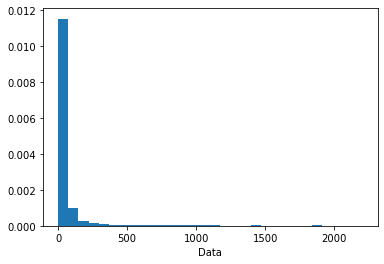

In [15]:


plt.hist(data['res_dep_diff'], density=True, bins=30)  # density=False would make counts
plt.ylabel('')
plt.xlabel('Data');


In [6]:
train_dataset = tf.data.Dataset.from_tensors((tf.convert_to_tensor(train_x), tf.convert_to_tensor(train_y)))
test_dataset = tf.data.Dataset.from_tensors((tf.convert_to_tensor(val_x), tf.convert_to_tensor(val_y)))

In [7]:
train_dataset

<TensorDataset shapes: ((3867, 4), (3867, 1)), types: (tf.float64, tf.float64)>

In [8]:
sbb = Sbb(checkpoint_path, output_size, input_size)

In [9]:
sbb.train(train_dataset, test_dataset, epochs=2000)

(4,)
Model: "DENSE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
DENSE-1-DENSE-1 (Dense)      (None, 256)               1280      
_________________________________________________________________
DENSE-1-NORM-1 (BatchNormali (None, 256)               1024      
_________________________________________________________________
DENSE-1-DROP-1 (Dropout)     (None, 256)               0         
_________________________________________________________________
DENSE-1-DENSE-2 (Dense)      (None, 256)               65792     
_________________________________________________________________
DENSE-1-NORM-2 (BatchNormali (None, 256)               1

InvalidArgumentError:  assertion failed: [predictions must be <= 1] [Condition x <= y did not hold element-wise:] [x (DENSE/dense/Relu:0) = ] [[0][0][0.960052252]...] [y (Cast_9/x:0) = ] [1]
	 [[{{node assert_less_equal/Assert/AssertGuard/else/_11/assert_less_equal/Assert/AssertGuard/Assert}}]] [Op:__inference_train_function_2178]

Function call stack:
train_function


In [ ]:
model.evaluate(test_dataset)